# Proyecto

#### Parate de los pasos que vas a realizar para el datacleaning

**Librerias**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ingorar errores
import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', 54)#Desplegar columnas para verlas todas

## Carga de datos

In [6]:
df = pd.read_csv('modeling_data.csv', sep=';', low_memory=False)

In [40]:
# las primeras 5 columnas
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [9]:
#dimesión de los datos
df.shape

(50000, 54)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [25]:
#verificar datos nulos
nulos= df.isnull().mean()*100 # en porciento

#Filtar solo los nulos
nulos[nulos>0].index

Index(['RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'PROFESSIONAL_CITY',
       'PROFESSIONAL_BOROUGH', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL.1'],
      dtype='object')

Las columnas con el mayor % deben de ser eliminadas. las demás se deben llenar
- columnas a eliminar: 
```python
['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE','EDUCATION_LEVEL.1'] 
```

In [33]:
data = df.drop(['PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'MATE_PROFESSION_CODE','EDUCATION_LEVEL.1'], 
              axis=1).copy()

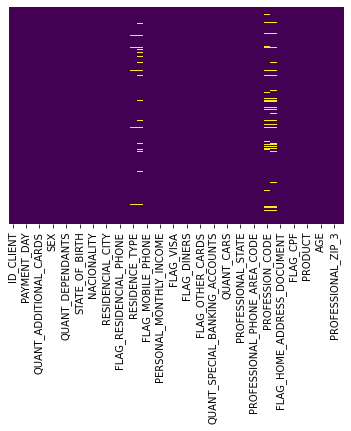

In [34]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');

### Revisar columnas

In [36]:
obj_cols = data.select_dtypes('object').columns

In [47]:
data[obj_cols].nunique()

CLERK_TYPE                          1
APPLICATION_SUBMISSION_TYPE         3
SEX                                 4
STATE_OF_BIRTH                     29
CITY_OF_BIRTH                    9910
RESIDENCIAL_STATE                  27
RESIDENCIAL_CITY                 3529
RESIDENCIAL_BOROUGH             14511
FLAG_RESIDENCIAL_PHONE              2
RESIDENCIAL_PHONE_AREA_CODE       102
FLAG_MOBILE_PHONE                   1
COMPANY                             2
PROFESSIONAL_STATE                 28
FLAG_PROFESSIONAL_PHONE             2
PROFESSIONAL_PHONE_AREA_CODE       87
FLAG_ACSP_RECORD                    1
RESIDENCIAL_ZIP_3                 794
PROFESSIONAL_ZIP_3                794
dtype: int64

Las columnas que tienen una caracteristica pueden ser eliminadas o no tomadas en consideracion  a hora de seleccionar las variables

por igual la que sobrepasan los 10:
ejemplo-
1. CLERK_TYPE                          
1. STATE_OF_BIRTH                     
1. CITY_OF_BIRTH                    
1. RESIDENCIAL_STATE                  
1. RESIDENCIAL_CITY                
1. RESIDENCIAL_BOROUGH             
1. RESIDENCIAL_PHONE_AREA_CODE       
1. FLAG_MOBILE_PHONE                   
1. PROFESSIONAL_STATE                 
1. PROFESSIONAL_PHONE_AREA_CODE       
1. FLAG_ACSP_RECORD                    
1. RESIDENCIAL_ZIP_3                 
1. PROFESSIONAL_ZIP_3

esas columnas no le portan nada al modelo

In [53]:
data = data.drop(['CLERK_TYPE',   
 'STATE_OF_BIRTH',                    
 'CITY_OF_BIRTH' ,                 
 'RESIDENCIAL_STATE' ,                
 'RESIDENCIAL_CITY' ,              
 'RESIDENCIAL_BOROUGH' ,            
 'RESIDENCIAL_PHONE_AREA_CODE',       
 'FLAG_MOBILE_PHONE',                
 'PROFESSIONAL_STATE',                 
 'PROFESSIONAL_PHONE_AREA_CODE',     
'FLAG_ACSP_RECORD',                    
'RESIDENCIAL_ZIP_3',                 
'PROFESSIONAL_ZIP_3'], axis =1).copy()

In [66]:
num_cols = data.select_dtypes(np.number).columns

In [68]:
data[num_cols].nunique()

ID_CLIENT                         50000
PAYMENT_DAY                           6
QUANT_ADDITIONAL_CARDS                1
POSTAL_ADDRESS_TYPE                   2
MARITAL_STATUS                        8
QUANT_DEPENDANTS                     17
EDUCATION_LEVEL                       1
NACIONALITY                           3
RESIDENCE_TYPE                        6
MONTHS_IN_RESIDENCE                  88
FLAG_EMAIL                            2
PERSONAL_MONTHLY_INCOME            5495
OTHER_INCOMES                       615
FLAG_VISA                             2
FLAG_MASTERCARD                       2
FLAG_DINERS                           2
FLAG_AMERICAN_EXPRESS                 2
FLAG_OTHER_CARDS                      2
QUANT_BANKING_ACCOUNTS                3
QUANT_SPECIAL_BANKING_ACCOUNTS        3
PERSONAL_ASSETS_VALUE               153
QUANT_CARS                            2
MONTHS_IN_THE_JOB                    21
PROFESSION_CODE                      19
OCCUPATION_TYPE                       6


Los datos de las columnas numericas que tienes de 1 los puedes eliminar no aportan al modelo
en total eliminaras 6 columnas
los demas son conocidas como columnas catagorias, tambien binarias ejemplo  
TARGET_LABEL_BAD=1 esta compuesta por 0 = no aplica para el credito 
y 1 = si aplica para el credito 


las demas que sobre pasan las pudes reducir o agrupar todo depende de ti.
lo puedes hacer utilizando la funcion pd.cut() o pd.qcut() o remplazando los valores >= de lo que desees filtar

In [70]:
# Ejemplo
data['FLAG_RG'].value_counts()

0    50000
Name: FLAG_RG, dtype: int64

In [72]:
data = data.drop(['QUANT_ADDITIONAL_CARDS','EDUCATION_LEVEL',  
'FLAG_HOME_ADDRESS_DOCUMENT' ,           
'FLAG_RG' ,                              
'FLAG_CPF' ,                             
'FLAG_INCOME_PROOF' ], axis =1  ).copy()      

In [74]:
data.head()

,ID_CLIENT,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,PRODUCT,AGE,TARGET_LABEL_BAD=1
0,1,5,Web,1,F,6,1,1,Y,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,N,0,9.0,4.0,1,32,1
1,2,15,Carga,1,F,2,0,1,Y,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,N,0,11.0,4.0,1,34,1
2,3,5,Web,1,F,2,0,1,Y,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,11.0,NaN,1,27,0
3,4,20,Web,1,F,2,0,1,N,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,NaN,NaN,1,61,0
4,5,10,Web,1,M,2,0,1,Y,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,N,0,9.0,5.0,1,48,1


In [75]:
data.shape

(50000, 31)

In [76]:
#estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_CLIENT,50000.0,25000.500000,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
PAYMENT_DAY,50000.0,12.869920,6.608385,1.0,10.00,10.0,15.00,25.0
POSTAL_ADDRESS_TYPE,50000.0,1.006540,0.080606,1.0,1.00,1.0,1.00,2.0
MARITAL_STATUS,50000.0,2.148400,1.322850,0.0,1.00,2.0,2.00,7.0
QUANT_DEPENDANTS,50000.0,0.650520,1.193655,0.0,0.00,0.0,1.00,53.0
NACIONALITY,50000.0,0.961600,0.202105,0.0,1.00,1.0,1.00,2.0
RESIDENCE_TYPE,48651.0,1.252225,0.867833,0.0,1.00,1.0,1.00,5.0
MONTHS_IN_RESIDENCE,46223.0,9.727149,10.668841,0.0,1.00,6.0,15.00,228.0
FLAG_EMAIL,50000.0,0.802280,0.398284,0.0,1.00,1.0,1.00,1.0
PERSONAL_MONTHLY_INCOME,50000.0,886.678437,7846.959327,60.0,360.00,500.0,800.00,959000.0


In [78]:
#estadisticas columnas objectos
data.describe(include='object').T

,count,unique,top,freq
APPLICATION_SUBMISSION_TYPE,50000,3,Web,28206
SEX,50000,4,F,30805
FLAG_RESIDENCIAL_PHONE,50000,2,Y,41809
COMPANY,50000,2,N,27959
FLAG_PROFESSIONAL_PHONE,50000,2,N,36510


a estas columnas objectos le vas a realizar en onehot encoder

Los pasos que vas a realizar es primero imputar los datos faltantes con simple imputer
luego el onehot encoder lo haces con la funcion make_transformer toma como ejemplo el link del proyecto de deep learning que te envie